<center>
    <h1> INF285 - Computación Científica I  / Tarea 1 </h1>
    <h2> Camilo Saldías </h2>
    <h2> camilo.saldias.12@sansano.usm.cl - 201223512-K </h2>
</center>

_Marzo 2017_

<div id='obj' />
# 1. introducción

A continuación, se presentan los desarrollos de los problemas planteados en la Tarea 1. Cada desarrollo está acompañado con el razonamiento detrás de su creación, en forma de una explicación previa y en comentarios en el código donde corresponda.

<div id='obj' />
# 2. Desarrollo
## 2.1 NumPy y SciPy
**1-** Implemente el producto matriz vector y compare el resultado sobre matrices aleatorias con el producto matriz de numpy. Realice el experimento para $10.000$ matrices de tamaño $100\times100$, presente los resultados en un histograma (numpy.histogram) de la norma del error entre su código y producto matriz vector de numpy.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
import scipy as sp
from ipywidgets import interact

In [19]:
#Creamos una matriz para ir almacenando las diferencias de 10000 experimentos
delta_result = np.zeros(10000)

#Funcion que multiplica una matriz por un vector
def producto(matriz, vector):
    #Creamos el vector resultado
    resultado = np.zeros((100, 1))
    #Multiplicamos cada fila de la matriz por el vector
    for fila in range(100):
        resultado[fila] = np.sum(matriz[fila].reshape(100, 1) * vector)
    return resultado

#Iteramos 10000 veces...
for it in range(10000):
    #Generamos la matriz y el vector de forma aleatoria
    matriz = np.random.rand(100,100)
    vector = np.random.rand(100, 1)
    #Hacemos la multiplicacion con la funcion antes creada y con numpy
    producto_func = producto(matriz, vector)
    producto_numpy = np.dot(matriz, vector)
    #Obtenemos la norma del error entre ambos resultados
    delta_result[it] = abs(np.linalg.norm(producto_func) - np.linalg.norm(producto_numpy))

#Creamos un histograma para mostrar los resultados
np.histogram(delta_result)

(array([8488,    0,    0,    0,    0, 1117,    0,    0,    0,  395]),
 array([  0.00000000e+00,   5.68434189e-15,   1.13686838e-14,
          1.70530257e-14,   2.27373675e-14,   2.84217094e-14,
          3.41060513e-14,   3.97903932e-14,   4.54747351e-14,
          5.11590770e-14,   5.68434189e-14]))

Deberíamos haber esperado que el error entre ambas operaciones fuera cero, dado que en esencia realizan la misma operación matemática. Sin embargo, el histograma nos muestra que existen minúsculas diferencias entre ambos métodos utilizados, lo que es de esperarse en operaciones computacionales de punto flotante.

**2-** Construya una matriz diagonal dominante con operaciones vectoriales. ¿Cómo demuestra que es diagonal dominante?

Una forma de hacerlo es guiarse por la definición: generar una matriz aleatoria, y hacer que los elementos de la diagonal sean iguales (o mayores) a la suma de los elementos restantes de sus respectivas filas y columnas. Esto se puede hacer con el siguiente código:

In [28]:
def genDiagDom():
    #Generamos una matriz aleatoria (por ejemplo, de 5x5)
    m = 100 * np.random.rand(5, 5)
    #Dejamos su diagonal en cero
    np.fill_diagonal(m, 0)
    #Cada elemento de la diagonal será igual a la máxima suma de los absolutos de los elementos de su fila y columna
    for i in range(5):
        m[i][i] = max(sum(abs(m[:, i])), sum(abs(m[i, :]))) + 1
    #Con esto tenemos una matriz diagonal dominante por filas y columnas
    return m

print(genDiagDom())

[[ 230.2591598    24.09145616   31.86176277   12.25470585   64.5226677 ]
 [  37.57028615  193.69880397   83.91729191   35.66421655   35.54700936]
 [  91.79744942   12.37280526  268.23657111   64.51768451   98.54863192]
 [  44.61330259   58.48987804   37.71605593  237.18386371   95.36462715]
 [  55.27812165    7.51484782   77.55620246   27.39609722  294.98293613]]


**3-** Multiplique 2 matrices diagonal dominante, ¿Es la matriz resultante diagonal dominante?

Podemos comprobarlo generando 2 matrices diagonales dominantes con la función anterior, multiplicándolas, y comprobando si el resultado es diagonal dominante o no.

In [42]:
#Chequeamos si una matriz es diagonal dominante por filas y/o columnas
def checkDiagDom(matriz):
    #Asumimos que la matriz es diag dominante a menos de que demostremos lo contrario
    dom_filas = True
    dom_col = True
    for i in range(matriz.shape[0]):
        #Es el elemento de la diagonal menor a la suma de los absolutos de
        #los restantes elementos de la fila y columna respectiva?
        #Si lo es, no es diagonal dominante por filas o columnas, según corresponda
        if (matriz[i][i] < sum(abs(matriz[1:, i]))-abs(matriz[i][i])):
            dom_col = False
        if (matriz[i][i] < sum(abs(matriz[i, 1:]))-abs(matriz[i][i])):
            dom_filas = False
    return (dom_filas, dom_col)

In [41]:
m1 = genDiagDom()
m2 = genDiagDom()
print(checkDiagDom(m1))
print(checkDiagDom(m2))
res = np.dot(m1, m2)
print(res)
print(checkDiagDom(res))

(True, True)
(True, True)
[[ 53900.40035739  24963.71464095  37977.40984978  16833.74613396
   32376.95245369]
 [ 17977.82498586  51447.80204979  29513.13706801  11959.970117
   15315.20136827]
 [ 17319.12294897  23134.42139127  54125.5926123   18894.98104287
   28902.10641269]
 [ 25507.05405303  18191.97281367  26100.68815306  43153.62048186
   37398.39161178]
 [ 35848.73580409  38203.44487432  38818.77469839  34974.56885871
   89464.18486214]]
(False, False)


Podemos observar que nuestras dos matrices de ejemplo son efectivamente diagonal dominante, pero que la multiplicación de estas dos no produce como resultado una matriz dominante.

**4-** Resuelva los siguientes sistemas de ecuaciones lineales para los $x_i$'s:
   * $x_1+1=x_2$, $x_1+x_2=10$
   
   Podemos obtener la forma matricial de este sistema de ec's lineales, y resolverla mediante NumPy:

In [46]:
coefs = np.array([1,-1,1,1]).reshape(2,2)
res = np.array([-1,10]).reshape(2,1)
np.linalg.solve(coefs, res)

array([[ 4.5],
       [ 5.5]])

   * $\displaystyle{\sum_{i=1}^{20} x_{i}}=1$, $\displaystyle{\sum_{i=1}^{20} a_{j,i}\,x_{i}}=1$, para $j=2 \dots 20$ y $a_{j,i}=(i+j)\exp{-(i-j)}$
   
   Este caso no es más que una generalización del anterior, por lo que procedemos de igual forma.

In [51]:
coefs = np.zeros((20, 20))
res = np.ones((20, 1))

#Primera sumatoria
coefs[0] = np.ones(20)

#Segunda sumatoria
for j in range(2,21):
    for i in range(1,21):
        coefs[j-1][i-1] = (i+j)*np.exp(-i+j)

np.linalg.solve(coefs, res)

array([[ -1.60225150e+14],
       [ -5.65208412e+13],
       [ -5.87500715e+14],
       [  5.58983326e+15],
       [ -5.93595116e+15],
       [  2.28103389e+16],
       [ -7.03834085e+15],
       [  4.32080152e+16],
       [ -9.07320042e+16],
       [ -1.07586198e+16],
       [  9.24448301e+17],
       [ -4.52493479e+18],
       [ -3.39500491e+18],
       [  6.38421200e+19],
       [ -6.31671942e+19],
       [ -1.96785204e+20],
       [ -2.50197501e+20],
       [  1.96915667e+19],
       [ -5.34341597e+20],
       [  9.67996962e+20]])

**5-** Construya un código basdo en scipy.optimize que encuentré el mínimo de $F(a_0,a_1)=\displaystyle{\sum_{i=1}^{1000}}(\exp(x_i)-a_0-a_1\,x_i)$, donde $x_i=-1+\frac{2}{999}(i-1)$.

Para resolver este problema, creamos una función `lambda` con la función a minimizar, y utilizamos `scipy.optimize.minimize` para encontrar los mínimos de la función.

In [67]:
from scipy.optimize import minimize
#Sumatoria para i desde 1 hasta 1000
F = lambda x: sum([(np.exp(-1+(2/999)*(i-1))-x[0]-x[1]*(-1+(2/999)*(i-1))) for i in range(1,1001)])
#Minimamos con valores iniciales a0=1, a1=1
res = minimize(F, (1,1))
print(res.x)

[  2.93632533e+08   1.78664956e+02]


<div id='sympy' />
## 2.2. _SymPy_

**1-** Obtenga el $\displaystyle{\lim_{x\rightarrow 0}\frac{\sin(x)}{x}}$ con sympy.

La respuesta se obtiene de forma directa:

In [6]:
x = sym.symbols('x')
sym.limit(sym.sin(x)/x, x, 0)

1

**2-** Obtenga la derivada de $f(x)=\displaystyle{\sin\left(\sum_{i=1}^{20}x^i\right)\cos\left(\prod_{i=1}^{20}\log(x+i)\right)}$

Procedemos de forma idéntica al punto anterior:

In [8]:
x = sym.symbols('x')
sym.diff(sym.sin(sum([x**i for i in range(1,21)]))*sym.cos(sym.prod([sym.log(x+i) for i in range(1,21)])), x)

(20*x**19 + 19*x**18 + 18*x**17 + 17*x**16 + 16*x**15 + 15*x**14 + 14*x**13 + 13*x**12 + 12*x**11 + 11*x**10 + 10*x**9 + 9*x**8 + 8*x**7 + 7*x**6 + 6*x**5 + 5*x**4 + 4*x**3 + 3*x**2 + 2*x + 1)*cos(log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(x + 17)*log(x + 18)*log(x + 19)*log(x + 20))*cos(x**20 + x**19 + x**18 + x**17 + x**16 + x**15 + x**14 + x**13 + x**12 + x**11 + x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x) - (log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(x + 17)*log(x + 18)*log(x + 19)/(x + 20) + log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(

**3-** Obtenga la parte real e imaginaria de la siguiente función compleja: $f(z)=z^2+1$, donde $z=x+\mathit{i}\,y$ y $\mathit{i}=\sqrt{-1}$

Utilizamos las funciones `re` e `im` de SymPy para encontrar las partes real e imaginaria, respectivamente, de la función $f(x)=(x+\mathit{i})^2+1$, donde $\mathit{i}=\sqrt{-1}$:

In [9]:
x = sym.symbols('x')
print("Real=", sym.re((x+sym.I)**2+1))
print("Imaginaria=", sym.im((x+sym.I)**2+1))

Real= -(im(x) + 1)**2 + re(x)**2 + 1
Imaginaria= 2*(im(x) + 1)*re(x)


**4-** Obtenga la inversa de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

Procedemos de forma directa, utilizando la función `inv()` para obtener la inversa de la matriz.

In [10]:
#Especificamos que a, b y c son símbolos (variables)
a = sym.symbols('a')
b = sym.symbols('b')
c = sym.symbols('c')
#Creamos la matriz...
M = sym.Matrix([[a, b], [c, a]])
#... y obtenemos su inversa
M.inv()

Matrix([
[1/a + b*c/(a**2*(a - b*c/a)), -b/(a*(a - b*c/a))],
[          -c/(a*(a - b*c/a)),      1/(a - b*c/a)]])

**5-** Obtenga los valores y vectores propios de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

Podemos obtener los valores y vectores propios de una matriz utilizando las funciones `eigenvals()` y `eigenvects()` de ScyPy:

In [16]:
#Especificamos que a, b y c son símbolos (variables)
a = sym.symbols('a')
b = sym.symbols('b')
c = sym.symbols('c')
#Creamos la matriz
M = sym.Matrix([[a, b], [c, a]])
#Obtenemos sus valores propios, en la forma {valor propio:multiplicidad}
print(M.eigenvals())
#...Y obtenemos sus vectores propios, en la forma [valor propio, multiplicidad, [vector propio]]
print(M.eigenvects())

{a - sqrt(b*c): 1, a + sqrt(b*c): 1}
[(a - sqrt(b*c), 1, [Matrix([
[-b/sqrt(b*c)],
[           1]])]), (a + sqrt(b*c), 1, [Matrix([
[b/sqrt(b*c)],
[          1]])])]


<div id='matplotlib' />
## 2.3. _Matplotlib_

**1-** Construya un plot de las siguientes funciones $\sin(x)$, $\cos(x)$, $\exp(\sin(x))$, y $\exp(-\tan^2(x))$ para $x=[0,2\,\pi]$. Todos deben incluirse en el mismo gráfico con diferentes colores y líneas sólidas. Debe incluir la leyenda respectiva, además de las etiquetas de los ejes y el título.

Graficamos las funciones utilizando la función `plot` de `matplotlib`, de acuerdo a su documentación:

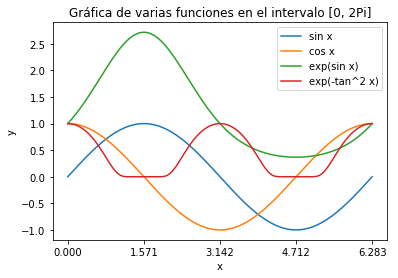

In [22]:
#Obtenemos los valores de x para el gráfico
x = np.arange(0, 2*np.pi+0.01, np.pi/64)
#Definimos (y grafiamos) las funciones
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(np.sin(x))
y4 = np.exp(-np.tan(x)**2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)

#Parte estética: nombres de líneas y etiquetas de ejes, título
plt.legend(['sin x', 'cos x', 'exp(sin x)', 'exp(-tan^2 x)'])
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
plt.title("Gráfica de varias funciones en el intervalo [0, 2Pi]")
plt.show()

**2-** Genere $10^6$ números aleatorios de la distribución normal estandar, obtenga un histograma con 50 bins. Grafique el histograma y la distribución normal estandar. ¿Se parecen?

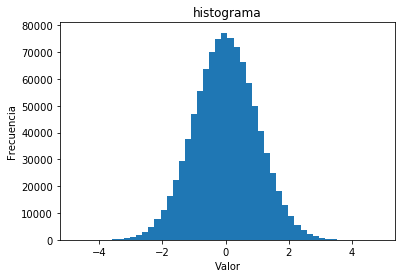

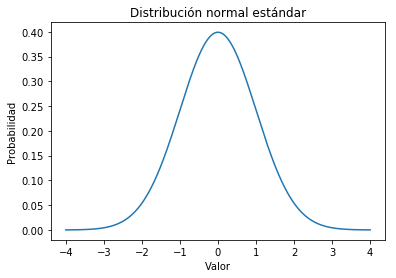

In [60]:
import scipy.stats as stats

#Generamos 10^6 números aleatorios en base a la dist. normal estándar
datos = np.random.randn(10**6)
#Hacemos el histograma con 50 bins
plt.figure(1)
plt.hist(datos, bins=50)
plt.title("histograma")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()
#Graficamos la distribución normal estándar
plt.figure(2)
datos = np.linspace(-4, 4, 10**6)
plt.plot(datos, stats.norm.pdf(datos,0,1))
plt.title("Distribución normal estándar")
plt.xlabel("Valor")
plt.ylabel("Probabilidad")
plt.show()

A simple vista, podemos observar que las curvas de ambas gráficas se parecen entre sí. Sin embargo las similitudes terminan ahí, ya que cada gráfica tiene distintas interpretaciones: Mientras que la primera (el histograma) denota la frecuencia con la que cierto dato aparece en el dataset, el segundo (dist. normal estándar) denota la probabilidad de obtener un valor dado, si obtenemos una muestra aleatoria desde nuestro dataset.

**3-** Construya la siguiente curva parametrica en 3D: $\vec{r}(t)=\langle \cos(t), \sin(t), t \rangle$.

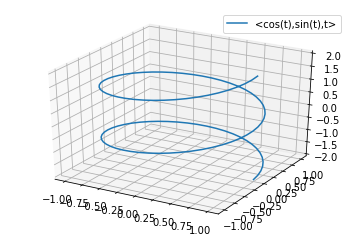

In [67]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-2 * np.pi, 2 * np.pi+0.01, 100)
z = np.linspace(-2, 2, 100)
x = np.cos(theta)
y = np.sin(theta)
ax.plot(x, y, z, label='<cos(t),sin(t),t>')
ax.legend()

plt.show()

**4-** Construya un plot en 2D de las ecuaciones de la pregunta **4.A** de la sección _Numpy y Scipy_. ¿Puede encontrar la solución observando la gráfica? ¿Se puede hacer lo mismo con **4.B**?

En el caso del punto **4.A**, basta con graficar las dos ecuaciones con `plt.plot` y encontrar la intersección:

x1= 4.5 , x2= 5.5


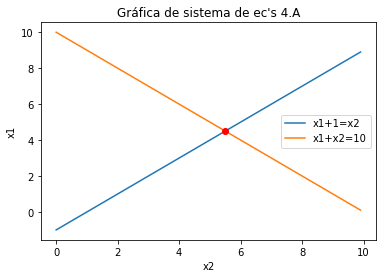

In [83]:
#Obtenemos los valores de x para el gráfico
x = np.arange(0., 10., 0.1)

y1 = x-1  #x1+1=x2  -> x1=x2-1
y2 = 10-x #x1+x2=10 -> x1=10-x2
plt.plot(x, y1)
plt.plot(x, y2)

#Obtenemos el punto de intersección entre las curvas
idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0).reshape(-1) + 0
plt.plot(x[idx][1], y1[idx][1], 'ro')
print("x1=", y1[idx][1], ", x2=", x[idx][1])

#Parte estética: nombres de líneas y etiquetas de ejes, título
plt.legend(['x1+1=x2', 'x1+x2=10'])
plt.xlabel('x2')
plt.ylabel('x1')
plt.title("Gráfica de sistema de ec's 4.A")
plt.show()

Para el caso del punto **4.B**, no existe forma (al menos aún) de graficar un espacio de 20 dimensiones en tan sólo 2, por lo que no es posible encontar una solución de forma gráfica.

**5-** Construya un plot en 3D de la función $F(a_0,a_1)$ de la pregunta 5 de la sección Numpy y Scipy. ¿Puede encontrar el mínimo observando la gráfica?

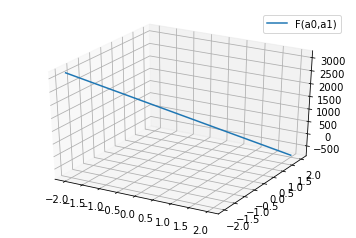

In [91]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
z = sum([(np.exp(-1+(2/999)*(i-1))-x-y*(-1+(2/999)*(i-1))) for i in range(1,1001)])
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
ax.plot(x, y, z, label='F(a0,a1)')
ax.legend()

plt.show()

A pesar de que graficar la función no presenta problemas, no es posible encontar un mínimo de la función dado que la misma es monótona, es decir, no cuenta con un mínimo por mucho que intentemos encontrarlo.

<div id='hands-on' />
## 2.4. _Hands-On_

**1-** Busque numéricamente la raíz de $\sin(x)$ que está entre $3$ y $3.2$. Ya sabemos que corresponde a $\pi$, pero aquí se quiere encontrar una forma de determinar $\pi$.

Para resolver este problema conviene utilizar un enfoque iterativo. En este caso, achicar progresivamente el intervalo hasta alcanzar cierta tolerancia respecto a nuestro valor esperado (en este caso, $sin(x)=0$. Procedemos de la siguiente forma:

In [6]:
epsilon = 10**-15 #Sobre 10**-15 alcanzamos el maximo numero de recursiones :(

def findPi(x0, x1):
    #Obtenemos el límite inferior y superior de nuestro invervalo
    lim_inf = np.sin(x0)
    lim_sup = np.sin(x1)
    
    #Y obtenemos el valor de la media de nuestro intervalo
    #Esperamos que este valor se acerque a cero
    media = np.mean([x0, x1])
    hip = np.sin(media)
    
    #La diferencia entre la media evaluada y el esperado, es menor a la tolerancia?
    if(abs(hip - 0) < epsilon):
        #Si lo es, encontré mi valor esperado
        return media
    #Si no, sigo por la mitad que esté más cerca a mi valor esperado
    elif(abs(lim_inf - 0) < abs(lim_sup - 0)):
        return findPi(x0, media)
    else:
        return findPi(media, x1)

findPi(3., 3.2)

3.141592653589794

Como podemos observar, logramos obtener una muy buena aproximación al valor de $\pi$.

**2-** Grafique $\displaystyle{\frac{\sin(x)}{x}}$ en el intervalo $[-1,1]$. ¿Ocurre algún problema? ¿Cómo se puede corregir?

El problema ocurre cuando evaluamos la función en $x=0$, lo que nos produce una división por cero (lo que claramente es indefinido). Una posible solución es graficar la función en 2 intervalos, $[-1, 0)$ y $(0, 1]$, evitando así el punto conflictivo:

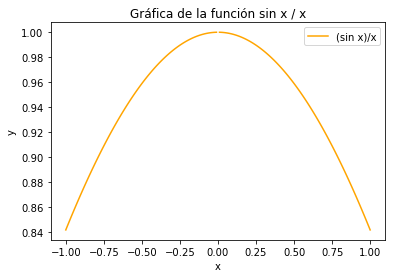

In [21]:
#Obtenemos los valores de x para el gráfico
x1 = np.arange(-1.00, 0.0, 0.01)
x2 = np.arange(0.01, 1.01, 0.01)
#Definimos (y grafiamos) las funciones
plt.plot(x1, np.sin(x1)/x1, color='orange')
plt.plot(x2, np.sin(x2)/x2, color='orange')
#Parte estética: nombres de líneas y etiquetas de ejes, título
plt.legend(['(sin x)/x'])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Gráfica de la función sin x / x")
plt.show()

Algo interesante a tener en cuenta es que, a la hora de graficar la función en el intervalo especificado de forma directa, no se observó problema alguno en el gráfico, aún cuando existe el problema en $x=0$ antes mencionado.

**3-** Considere los siguientes puntos: $(0.1,0.7, 4.2)$, $(0.5,0.5, 3.3)$, $(0.9,0.7, 4.2)$ y $(0.18,0.3, 2.5)$. Grafique los puntos utilizando la función scatter de matplotlib. ¿Cuál es la mejor función lineal que aproxima esos puntos?

Graficar los puntos en un espacio 3D es la parte "fácil": basta con seguir la documentación existente para la función `scatter` para lograrlo. El desafío es obtener la regresión lineal para los puntos mostrados.

Para obtener una función lineal que aproxime los puntos, debemos obtener algo del estilo $z=a*x+b*y+c$, donde $a$, $b$ y $c$ son los coeficientes que debemos encontrar. Para hacerlo, empleamos la función `linalg.lstsq` de NumPy, cuyos parámetros son 2 matrices con las variables dependientes e independientes, respectivamente. Esta función nos entrega de vuelta los coeficientes $a$, $b$ y $c$ de nuestra función lineal, por lo que podemos graficar la línea que mejor aproxima los puntos.

Regresión: z= -0.0171821305842*x+4.2852233677*y+1.20034364261


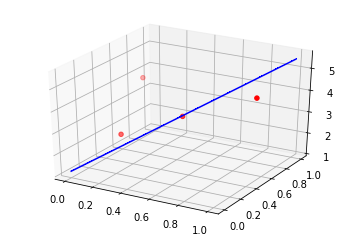

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#Especificamos los puntos sobre los cuales hacer la regresión
x = np.array([0.1, 0.5, 0.9, 0.18])
y = np.array([0.7, 0.5, 0.7, 0.3])
z = np.array([4.2, 3.3, 4.2, 2.5])

#Ponemos los puntos en un gráfico 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, color='red', marker='o')

#Obtenemos la recta que mejor aproxima a los puntos
A = np.vstack([x, y, np.ones(len(x))]).T
a, b, c = np.linalg.lstsq(A, z)[0]
print("Regresión: z=",str(a)+"*x+"+str(b)+"*y+"+str(c))

#Graficamos la línea obtenida anteriormente
x1 = np.linspace(0., 1., num=100)
y1 = np.linspace(0., 1., num=100)
ax.plot(x1, y1, a*x1+b*y1+c, color='blue', marker=',')
plt.show()

**4-** Construya los siguientes campos vectoriales en 2D: $\langle x,y\rangle$,$\langle -y,x\rangle$ y $\langle x-y,x+y\rangle$ . ¿Qué patron observa?

Para construir los campos vectoriales, utilizamos la función `quiver` de matplotlib:

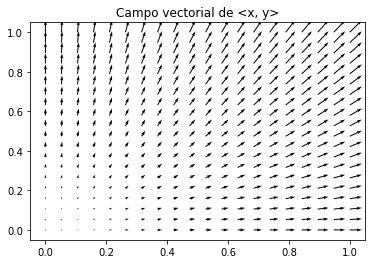

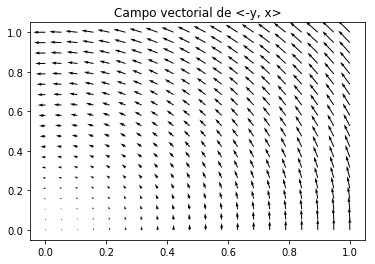

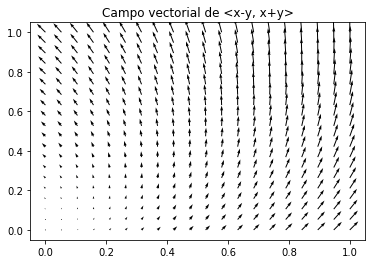

In [62]:
x, y = np.meshgrid(np.linspace(0., 1., 20), np.linspace(0., 1., 20))

#Campo <x, y>
plt.figure()
Q = plt.quiver(x, y, x, y)
plt.title("Campo vectorial de <x, y>")

#Campo <-y, x>
plt.figure()
A = plt.quiver(x, y, -y, x)
plt.title("Campo vectorial de <-y, x>")

#Campo <x-y, x+y>
plt.figure()
B = plt.quiver(x, y, x-y, x+y)
plt.title("Campo vectorial de <x-y, x+y>")

plt.show()

<div id='obj' />
# 3. Conclusiones
En esta tarea, logramos introducirnos al uso de las múltiples librerías disponibles en Python para el anáilisis computacional de diversos problemas matemáticos. Esto nos otorga la capacidad de poder resolver problemas altamente complejos en un tiempo acotado (o al menos razonable) en base a una gran cantidad de datos, algo que a mano es difícilmente cuantificable.

En particular, esta tarea me sirvió para poder familiarizarme con el uso de Python como una herramienta de análisis matemático, y de poder vislumbrar las capacidades de las múltiples librerías que aquí utilizamos.

<div id='obj' />
# 4. Referencias
* _Markdown_ https://help.github.com/articles/basic-writing-and-formatting-syntax/
* _numpy_ http://www.numpy.org
* _scipy_ https://www.scipy.org/scipylib/index.html
* _sympy_ http://docs.sympy.org/latest/index.html
* _matplotlib_ http://matplotlib.org